In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#all_assets = ['A2M', 'AGL', 'ALL', 'ALQ', 'ALU', 'ALX', 'AMC', 'AMP', 'ANN', 'ANZ', 'APA', 'APT', 'AST', 'ASX', 'AWC', 'AZJ', 'BEN', 'BHP', 'BLD', 'BOQ', 'BPT', 'BSL', 'BXB', 'CAR', 'CBA', 'CCL', 'CGF', 'CHC', 'CIM', 'COH', 'COL', 'CPU', 'CSL', 'CTX', 'CWN', 'CWY', 'DMP', 'DOW', 'DXS', 'EVN', 'FBU', 'FLT', 'FMG', 'FPH', 'GMG', 'GOZ', 'GPT', 'HVN', 'IAG', 'IEL', 'ILU', 'IPL', 'JBH', 'JHX', 'LLC', 'MFG', 'MGR', 'MPL', 'MQG', 'NAB', 'NCM', 'NST', 'ORG', 'ORI', 'OSH', 'QAN', 'QBE', 'QUB', 'REA', 'RHC', 'RIO', 'RMD', 'S32', 'SAR', 'SCG', 'SEK', 'SGP', 'SGR', 'SHL', 'SKI', 'SOL', 'SPK', 'STO', 'SUN', 'SVW', 'SYD', 'TAH', 'TCL', 'TLS', 'TPM', 'TWE', 'VCX', 'VEA', 'WBC', 'WES', 'WOR', 'WOW', 'WPL', 'WTC', 'XRO']
assets = ['A2M', 'AGL', 'ALL', 'ALQ', 'ALU', 'ALX', 'AMC', 'AMP', 'ANN', 'ANZ', 'APA', 'AST', 'ASX', 'AWC', 'AZJ', 'BEN', 'BHP', 'BLD', 'BOQ', 'BPT', 'BSL', 'BXB', 'CAR', 'CBA', 'CCL', 'CGF', 'CHC', 'CIM', 'COH', 'CPU', 'CSL', 'CTX', 'CWN', 'CWY', 'DMP', 'DOW', 'DXS', 'EVN', 'FBU', 'FLT', 'FMG', 'FPH', 'GMG', 'GOZ', 'GPT', 'HVN', 'IAG', 'ILU', 'IPL', 'JBH', 'JHX', 'LLC', 'MFG', 'MGR', 'MPL', 'MQG', 'NAB', 'NCM', 'NST', 'ORG', 'ORI', 'OSH', 'QAN', 'QBE', 'QUB', 'REA', 'RHC', 'RIO', 'RMD', 'SAR', 'SCG', 'SEK', 'SGP', 'SGR', 'SHL', 'SKI', 'SOL', 'SPK', 'STO', 'SUN', 'SVW', 'SYD', 'TAH', 'TCL', 'TLS', 'TPM', 'TWE', 'VCX', 'WBC', 'WES', 'WOR', 'WOW', 'WPL', 'XRO']

def read_asset(filename):
    csv_path = filename + ".csv"
    return pd.read_csv(csv_path, index_col = 'Date')['Adj Close'] 

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through each asset and add it to the DataFrame
for asset in assets:
    df[asset] = read_asset(asset)
df = df.dropna().pct_change().dropna().reset_index(drop=True)
df

,A2M,AGL,ALL,ALQ,ALU,ALX,AMC,AMP,ANN,ANZ,...,TLS,TPM,TWE,VCX,WBC,WES,WOR,WOW,WPL,XRO
0,0.000000,-0.007237,0.002372,-0.014115,-0.008989,0.003077,-0.001424,0.004658,0.049002,-0.005186,...,0.003169,0.020719,0.019533,0.000000,-0.005077,-0.009324,-0.021990,-0.009834,-0.018540,-0.014151
1,-0.017699,0.001988,-0.004734,-0.012269,0.013606,0.018406,0.011412,0.010819,-0.008997,0.006036,...,-0.001580,0.008547,0.015325,0.009869,0.006889,-0.000920,-0.006424,-0.007192,0.007971,0.021314
2,-0.018018,0.005291,-0.010701,0.053832,0.015660,-0.015062,0.006347,-0.003058,0.012221,0.006272,...,0.001582,0.018009,0.020755,-0.006515,0.005324,0.001150,0.026940,0.000000,0.006442,0.006814
3,-0.009174,-0.010526,0.003606,0.019646,0.017621,0.009175,0.002102,0.012270,-0.001725,-0.002981,...,-0.001580,-0.024974,0.011091,0.013114,0.002521,0.006658,0.043022,0.002069,0.020366,0.008883
4,-0.009259,-0.002660,0.008383,-0.038535,-0.012987,-0.006061,-0.002797,-0.003030,0.008639,-0.004621,...,-0.007911,0.008538,-0.005485,-0.009709,-0.006034,-0.002967,-0.018109,0.000000,-0.026802,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.006289,0.036774,-0.021063,0.082627,0.065956,0.009579,0.016077,0.083333,0.023097,0.007846,...,0.000000,-0.002874,0.016227,-0.049327,0.010726,0.040706,0.087273,0.008512,0.038661,0.037162
1264,-0.008125,-0.008712,-0.013692,0.054795,-0.036680,0.009488,-0.007911,0.028340,-0.029682,-0.073653,...,-0.037975,-0.031700,-0.055888,-0.089623,-0.070537,-0.072476,-0.031773,-0.052546,-0.064444,-0.038632
1265,0.063642,0.065913,0.070402,0.035250,0.077692,0.120301,0.036683,0.051181,0.250754,0.084680,...,0.069079,0.056548,0.039112,0.010363,0.085292,0.112868,0.029361,0.095977,0.067102,0.042945
1266,-0.016588,0.012368,-0.011116,-0.003584,0.020343,-0.075503,0.003077,0.000000,-0.063383,0.010727,...,-0.055385,-0.029577,0.020346,0.061538,0.021040,-0.045138,0.031879,-0.079706,0.013356,-0.001323


## Risk Measurement
The return distribution follows approxiamately normal distribution. Therefore, this project adopts volatility as a risk measurement

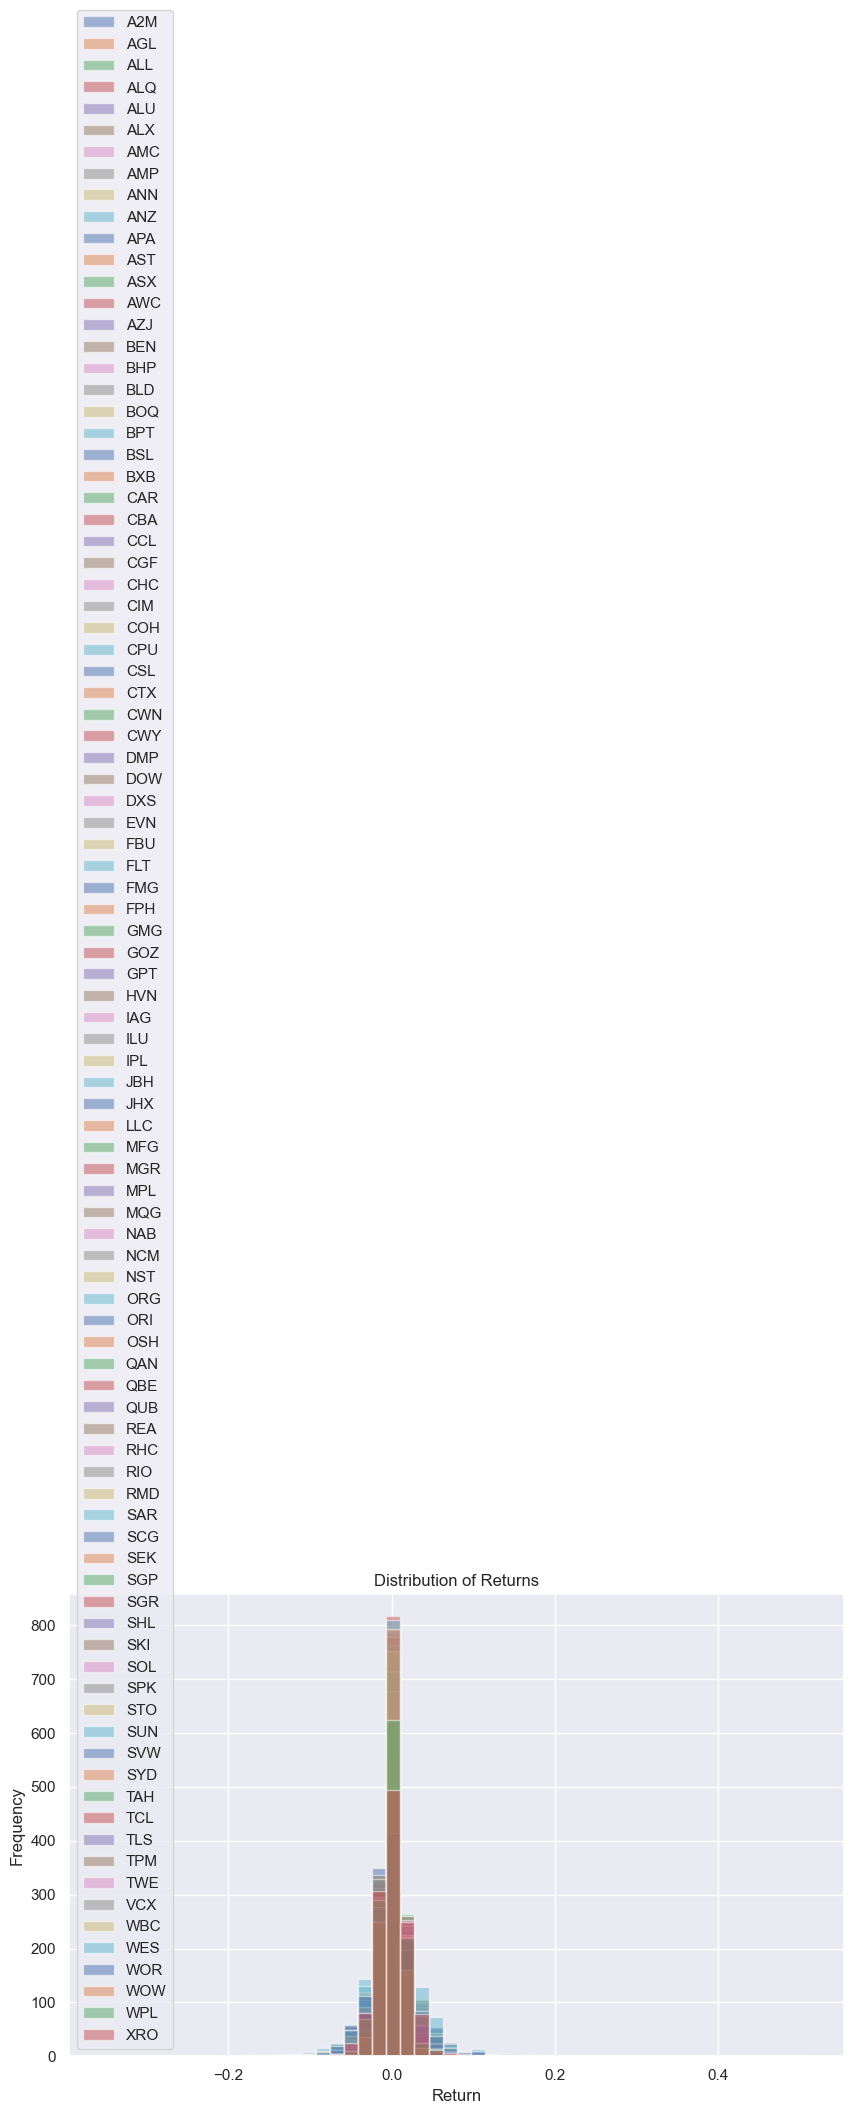

In [132]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='hist', bins=50, alpha=0.5, ax=ax)
ax.set_title('Distribution of Returns')
ax.set_xlabel('Return')
plt.show()

# Expected Portfolio Return Optimization

Our first model aims at maximizing the expected portfolio return with several constraints including budget, minimum and maximum investment for each asset, risk and target return. Our investment budget is initialized to be 100000000.

In [135]:
from gurobipy import *
import pandas as pd

cov_matrix = df.cov()

# Parameters
investment_budget = 100000000  # Total investment budget
assets = df.columns  # Assuming the columns of df are asset names
min_investment = {asset: 0 for asset in assets}  # Min weight for each asset
max_investment = {asset: 0.2 for asset in assets}  # Max weight for each asset, e.g., 10%
risk_limit = 0.5  # Example risk limit, replace with your value
target_return = 0.002  # Example target return, replace with your value

m = Model('portfolio')
port = {asset: m.addVar(lb=min_investment[asset], ub=max_investment[asset], vtype=GRB.CONTINUOUS, name=asset) for asset in assets}
m.setObjective(sum(df[asset].mean() * port[asset] for asset in assets), GRB.MAXIMIZE)

# Budget Constraint
m.addConstr(sum(port[asset] for asset in assets) == 1, "Budget")

# Risk Constraint
portfolio_variance = sum(sum(cov_matrix.loc[asset_i, asset_j] * port[asset_i] * port[asset_j] for asset_j in assets) for asset_i in assets)
m.addConstr(portfolio_variance <= risk_limit**2, "Risk")

# Target Return Constraint
m.addConstr(sum(df[asset].mean() * port[asset] for asset in assets) >= target_return, "TargetReturn")
m.optimize()

if m.status == GRB.Status.OPTIMAL:
    print('Optimal solution found:')
    for asset in assets:
        print(f"{asset}: {port[asset].x}")
    print(f'Objective Value (Expected Return): {m.objVal}')
else:
    print('Optimal solution not found.')



Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 94 columns and 188 nonzeros
Model fingerprint: 0xefb969f7
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [6e-06, 1e+00]
  QMatrix range    [2e-07, 1e-03]
  Objective range  [6e-06, 3e-03]
  Bounds range     [2e-01, 2e-01]
  RHS range        [2e-03, 1e+00]
  QRHS range       [2e-01, 2e-01]
Presolve time: 0.00s
Presolved: 2 rows, 94 columns, 188 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.77614630e-02  7.10368855e-02  6.37e+01 1.11e-16  1.43e+00     0s
   1   3.48257037e-03  4.45365184e-02  3.38e+00 1.44e-15  1.

# Markowitz Model

The Markowitz model, also known as the Mean-Variance Optimization model, is a fundamental approach in modern portfolio theory for optimizing asset allocation. The model focuses on maximizing the portfolio's expected return for a given level of risk or minimizing risk for a given level of expected return.

## Formula and Notation

$$\min_w  f(w) = -\sum_{i=1}^{n} w_i \cdot r_i + \theta \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \Sigma_{ij} $$


- **Expected Return**: $$\sum (w_i \times r_i)$$
  - $ w_i $: Weight of asset $i$
  - $ r_i $: Expected return of asset $i$
  
- **Risk (Variance)**: $$\sum (w_i^2 \times \sigma_i^2)$$
  - $ \sigma_i^2$: Variance of asset $i$

- **Risk Parameter**: $\theta$
  - $\theta$ quantifies the investor's risk aversion. Generally speaking, A higher $\theta$ leads to a more risk-averse portfolio, prioritizing lower variance over higher returns.

In [143]:
covariance_matrix = df.cov()

# Risk preference parameter theta
theta = 2 

m = gp.Model("portfolio")
weights = m.addVars(assets, lb=0, ub=1, vtype=GRB.CONTINUOUS, name="weights")
m.addConstr(weights.sum() == 1, "budget")
objective = -gp.quicksum(weights[asset] * expected_returns[i] for i, asset in enumerate(assets)) + \
            theta * gp.quicksum(weights[asset_i] * weights[asset_j] * covariance_matrix.loc[asset_i, asset_j] 
                                for asset_i in assets for asset_j in assets)
m.setObjective(objective, GRB.MINIMIZE)
m.optimize()

if m.status == GRB.Status.OPTIMAL:
    print('Optimal solution found:')
    optimal_weights = m.getAttr('x', weights)
    for asset in assets:
        print(f"{asset}: {optimal_weights[asset]}")
    print(f'Objective Value (Expected Return): {m.objVal}')
else:
    print('Optimal solution not found.')


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 94 columns and 94 nonzeros
Model fingerprint: 0xc83479bf
Model has 4465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-06, 3e-03]
  QObjective range [7e-07, 5e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 1 rows, 94 columns, 94 nonzeros
Presolved model has 4465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 93
 AA' NZ     : 4.371e+03
 Factor NZ  : 4.465e+03
 Factor Ops : 2.813e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.85605635e+05 -1.86391181e+05  7.62e+04 4.48e-02  2.50e+05     0s
   1   1.83245168e+0

# Risk Parity

Approaches based on the mean-variance framework typically necessitate expected returns and expected volatility as fundamental inputs, leading to an optimization of portfolio weights that are prone to over-concentration and heightened sensitivity to these parameters. When there is a difficulty in precisely forecasting expected returns, the efficacy of these methods in practical applications tends to be markedly compromised. Additionally, these strategies commonly fail to account for the heterogeneity in how distinct risky assets contribute to the total risk of the portfolio.

$$
\min_w f(w) = \sum_{i=1}^{n} \sum_{j=1}^{n} (w_i (\sum_{k} w_{k})_i - w_j (\sum_{k} w_{k})_j)^2 \\
\text{s.t.} \quad \sum_i w_i = 1, \\
0 \leq w \leq 1 \\
$$


In [108]:
import numpy as np
def risk_parity_target(w, V):
    w = np.matrix(w).T
    risk_contributions = np.multiply(w, V @ w) / (w.T @ V @ w)
    risk_diffs = risk_contributions - risk_contributions.T
    squared_diffs = np.square(risk_diffs)
    target = squared_diffs.sum()
    return target
    
# Risk Parity Solver for any number of assets
def rp(V):
    num_assets = V.shape[0]
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    w0 = np.array([1/num_assets] * num_assets)
    bnds = tuple((0.00001, 1) for _ in range(num_assets))
    res = minimize(risk_parity_target, w0, args=[V], method='SLSQP', constraints=cons, bounds=bnds, tol=1e-20)
    return res.x

V = np.matrix(np.cov(df, rowvar=False))
result = rp(V)
print(result)

[0.01043161 0.00662652 0.0138378  0.01285206 0.01091094 0.01049221
 0.00644038 0.01208216 0.00977372 0.01316065 0.00685665 0.00477593
 0.00878929 0.01340068 0.00749283 0.0113586  0.01342291 0.01230328
 0.01054662 0.02290112 0.01598914 0.00803469 0.01117676 0.01114992
 0.00791856 0.01774642 0.0102534  0.01369741 0.00966298 0.01116951
 0.00904141 0.00983458 0.00976718 0.01160439 0.00781662 0.01375368
 0.00868539 0.00153756 0.00914169 0.01077532 0.01544744 0.00424223
 0.01026132 0.00729245 0.00928972 0.01056227 0.00979511 0.01406458
 0.01202759 0.00997391 0.01176585 0.01349336 0.01608291 0.01059051
 0.00738742 0.01418697 0.01210814 0.00325309 0.0016281  0.01768545
 0.01115185 0.01926777 0.01082074 0.01306882 0.01087015 0.01227104
 0.00955597 0.01099843 0.00587561 0.00125335 0.00996585 0.01219816
 0.0112767  0.01071974 0.00736222 0.00492202 0.00774043 0.00456678
 0.02084233 0.01126788 0.01651791 0.00776108 0.00910296 0.0079463
 0.00579174 0.0097249  0.01031428 0.00998523 0.01244873 0.00897